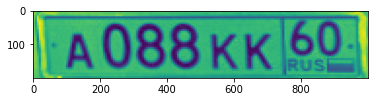

149
1.3


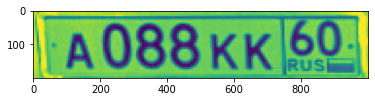

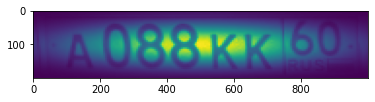

In [ ]:
import cv2 # добавить библеотеки
import os
import sys
import numpy
from matplotlib import pyplot as plt
from statistics import mean 
os.chdir('C://Users//IQ//DataSet//Images//train//img')  # изменяем путь
  # создаем переменную в которой будет хранится изображение

def viewImage(image, name_of_window): # создаем функцию
    plt.imshow(image)
    plt.show()
#   cv2.namedWindow(name_of_window, cv2.WINDOW_NORMAL)  
#     cv2.imshow(name_of_window, image) # открываем изображение
#     cv2.waitKey(0) # ждем пока не нажмем на кнопку
#     cv2.destroyAllWindows() # закрываем открытые программой окна
l = os.listdir()  
Plates = 0
for i in l:
    Plates += 1
    image = cv2.imread(i, 0)
        
    
    resized = cv2.resize(image, (1000, 200), interpolation = cv2.INTER_AREA)    # изменяем размер
    viewImage(resized, "resize") 
    # выводим изображение в окно
    rows, cols = resized.shape[:2]
    Array = []
    for i in range(rows):
        for j in range(cols):
            Array.append(resized[i][j])  
    print(mean(Array))
    mean(Array)
    if 200 - mean(Array) > 0:
        alpha2 = 1 + (200 - mean(Array))/170 # Contrast control (1.0-3.0)
    else:
        alpha2 = 1 - (mean(Array) - 200)/170 # Contrast control (1.0-3.0)
    print(alpha2)
    beta = 0 # Brightness control (0-100)
    alpha = alpha2
    adjusted = cv2.convertScaleAbs(resized, alpha=alpha, beta=beta)
    viewImage(adjusted, "Contrast")
    
    bgr_image = cv2.cvtColor(adjusted, cv2.COLOR_RGB2BGR) # изменить тип цвета на BGR


    gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY) # изменить цвет на серый
    

    #########################################
    row, cols = gray_image.shape



    a = cv2.getGaussianKernel(cols, 250)
    b = cv2.getGaussianKernel(row, 40)
    c = b * a.T
    d = c / c.max()
    e = gray_image * d
    
    viewImage(e, "Viniet")
    ImgName = "Test5.jpg"
    im = cv2.imwrite(ImgName,e)

    image2 = cv2.imread(ImgName, 0)
    cv2.imshow("Image", image2)
    cv2.waitKey(0) # ждем пока не нажмем на кнопку
    cv2.destroyAllWindows()
    ########################################



    blurred = cv2.GaussianBlur(image2, (15, 15), 0) # добавить блюр
    
    

    #######################################

    th3 = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
        cv2.THRESH_BINARY,69,2)

    viewImage(th3, "th")
    
    #######################################
    
    blurred2 = cv2.GaussianBlur(th3, (7, 7), 0) # добавить блюр
    
    

    
    
    
    contours, hierarchy = cv2.findContours(blurred2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # находим контуры

    
    whiteimage = cv2.imread('C://Users//IQ//TestFile//WhiteIm.jpg')
    Wcut = whiteimage[0:200,                         # первая точка высоты:вторая точка высоты,
                    0:1000]  
    
    cv2.drawContours(Wcut, contours, -1, (255,255,0), 9, cv2.LINE_AA, hierarchy, 3)
    # отображаем контуры поверх изображения

    viewImage(Wcut, "borders")   # выводим итоговое изображение в окно
    
    
    bounding_boxes = []
    
    for countor in contours:
        xmin, xmax, ymin, ymax = 10000, -1, 10000, -1
        
        for point in countor:
            point = point[0]
            
            x, y = point
            if x > xmax:
                xmax = x
            elif x < xmin:
                xmin = x
            elif y > ymax:
                ymax = y
            elif y < ymin:
                ymin = y
        if xmin == xmax or ymin == ymax or abs(xmax - xmin) < 50 or abs(ymax - ymin) < 50:
            continue
        bounding_boxes.append([ymin, ymax, xmin, xmax])
        cv2.rectangle(gray_image,(xmin, ymax), (xmax, ymin), (0,255,255), 1)
         
    viewImage(gray_image, "Numbers")
    print(bounding_boxes)
    Nxmin = 10000
    Nxmax = 10000
    for Num in bounding_boxes:
        
        if Num[0] == 10000 or Num[3] == 999 or Num[2] > Nxmin and Num[3] < Nxmax or Num[3] - Num[2] > 200:
            continue
        cut = gray_image[Num[0]:Num[1],                         # первая точка высоты:вторая точка высоты,
                    Num[2]:Num[3]]  
        Nxmin = Num[2]
        Nxmax = Num[3]
        viewImage(cut, "Numbers2")
    bounding_boxes = []
    if Plates == 10:
        break

In [ ]:
import cv2
import os
import sys
import numpy
from matplotlib import pyplot as plt
from statistics import mean 
os.chdir('C://Users//IQ//DataSet//Images//test//img')
img = cv2.imread('A001BP54.png', 0)
rows, cols = img.shape[:2]
Array = []
for i in range(rows):
    for j in range(cols):
        Array.append(img[i][j])  
        
print(mean(Array))   
alpha = 1.25 # Contrast control (1.0-3.0)
beta = 0 # Brightness control (0-100)

adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
rows2, cols2 = adjusted.shape[:2]
Array2 = []
for i in range(rows2):
    for j in range(cols2):
        Array2.append(img[i][j])  
print(mean(Array2))

cv2.imshow('adjusted', adjusted)
cv2.waitKey(0)

cv2.destroyAllWindows() # закрываем открытые программой окна


In [ ]:

row,cols = image.shape



a = cv2.getGaussianKernel(cols,300)
b = cv2.getGaussianKernel(row,300)

c = b*a.T

d = c/c.max()

e = image*d



viewImage(image, "Hi")

In [ ]:
import cv2
import numpy as np
import os


os.chdir('C://Users//IQ//TestFile')  # изменяем путь
img = cv2.imread("a4da94u-960.jpg", 0)

cv2.waitKey(0) # ждем пока не нажмем на кнопку
cv2.destroyAllWindows()

row, cols = img.shape



a = cv2.getGaussianKernel(cols, 110)
b = cv2.getGaussianKernel(row, 60)
c = b * a.T
d = c / c.max()
e = img * d

ImgName = "Test1.jpg"
im = cv2.imwrite(ImgName,e)

img2 = cv2.imread(ImgName, 0)
cv2.imshow("Image", img2)
cv2.waitKey(0) # ждем пока не нажмем на кнопку
cv2.destroyAllWindows()